In [2]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import subprocess
import json

# モデルの入力パラメータの定義（パラメータとその範囲）
problem = {
    'num_vars': 10,  # パラメータの数
    'names': ['wall_u_value', 'glass_u_value', 'glass_eta_value', 'Qref_rated_cool', 'Qref_rated_heat',
              'AirHeatExchangeRateCooling', 'AirHeatExchangeRateHeating', 'Fan_air_volume', 'Lighting_rated_power', 'Hot_water_rated_capacity'],
    'bounds': [
        # [0.01, 1000],       # wall_u_valueの範囲 [0.05, 10]
        # [0.01, 1000],       # glass_u_valueの範囲
        # [0.01, 1000],       # glass_eta_valueの範囲
        # [100, 100000],     # Qref_rated_coolの範囲
        # [100, 100000],     # Qref_rated_heatの範囲
        # [1, 10000],         # AirHeatExchangeRateCoolingの範囲
        # [1, 10000],         # AirHeatExchangeRateHeatingの範囲
        # [10, 3000],     # Fan_air_volumeの範囲
        # [0, 1000000],      # Lighting_rated_powerの範囲
        # [15.0, 25.0]
        [0.01, 5],       # wall_u_valueの範囲
        [0.01, 5],       # glass_u_valueの範囲
        [0.01, 5],       # glass_eta_valueの範囲
        [1200, 1600],     # Qref_rated_coolの範囲
        [1000, 1300],     # Qref_rated_heatの範囲
        [40, 60],         # AirHeatExchangeRateCoolingの範囲
        [20, 40],         # AirHeatExchangeRateHeatingの範囲
        [2000, 3000],     # Fan_air_volumeの範囲
        [0, 100000],      # Lighting_rated_powerの範囲
        [15.0, 25.0]
    ]
}

# Saltelliサンプリングで入力サンプルを生成
param_values = saltelli.sample(problem, 1024)

# モデルの実行とBEI値の取得
def run_model(params):
    # param.datファイルに新しいパラメータ値を書き込む
    with open("param.dat", "w") as f:
        f.write(f"wall_u_value = {params[0]}\n")
        f.write(f"glass_u_value = {params[1]}\n")
        f.write(f"glass_eta_value = {params[2]}\n")
        f.write(f"Qref_rated_cool = {params[3]}\n")
        f.write(f"Qref_rated_heat = {params[4]}\n")
        f.write(f"AirHeatExchangeRateCooling = {params[5]}\n")
        f.write(f"AirHeatExchangeRateHeating = {params[6]}\n")
        f.write(f"Fan_air_volume = {params[7]}\n")
        f.write(f"Lighting_rated_power = {params[8]}\n")
        f.write(f"Hot_water_rated_capacity = {params[9]}\n")

    # 外部のPythonスクリプトを実行
    subprocess.run(["python3", "generate_input_zebopt_for_sensitivity.py", "param.dat", "input_zebopt.json"])
    subprocess.run(["python3", "../builelib_zebopt_run.py", "input_zebopt.json", "zebopt"])

    # 実行結果のBEI値をJSONから取得
    with open("zebopt_result.json", "r") as f:
        output_data = json.load(f)
        return output_data["BEI"]

# 各サンプルに対してモデルを実行し、BEI値を取得
Y = np.array([run_model(params) for params in param_values])

# Sobol感度分析を実行
Si = sobol.analyze(problem, Y, print_to_console=True)

# 結果の表示
print("一次Sobol指数 (S1):", Si['S1'])
print("全順序Sobol指数 (ST):", Si['ST'])

/var/folders/gb/554jf77919n71lnl_60zjctm0000gn/T/ipykernel_40650/1514378839.py:37: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1024)


BEI値: 1.560, 総実行時間: 0.49 秒
BEI値: 1.660, 総実行時間: 0.48 秒
BEI値: 1.600, 総実行時間: 0.49 秒
BEI値: 1.610, 総実行時間: 0.51 秒
BEI値: 1.540, 総実行時間: 0.48 秒
BEI値: 1.560, 総実行時間: 0.49 秒
BEI値: 1.560, 総実行時間: 0.48 秒
BEI値: 1.560, 総実行時間: 0.48 秒
BEI値: 1.560, 総実行時間: 0.50 秒
BEI値: 1.430, 総実行時間: 0.48 秒
BEI値: 1.560, 総実行時間: 0.48 秒
BEI値: 1.480, 総実行時間: 0.48 秒
BEI値: 1.610, 総実行時間: 0.50 秒
BEI値: 1.630, 総実行時間: 0.48 秒
BEI値: 1.660, 総実行時間: 0.48 秒
BEI値: 1.650, 総実行時間: 0.48 秒
BEI値: 1.640, 総実行時間: 0.51 秒
BEI値: 1.640, 総実行時間: 0.51 秒
BEI値: 1.640, 総実行時間: 0.47 秒
BEI値: 1.710, 総実行時間: 0.48 秒
BEI値: 1.640, 総実行時間: 0.49 秒
BEI値: 1.640, 総実行時間: 0.48 秒
BEI値: 1.350, 総実行時間: 0.48 秒
BEI値: 1.310, 総実行時間: 0.47 秒
BEI値: 1.340, 総実行時間: 0.47 秒
BEI値: 1.250, 総実行時間: 0.48 秒
BEI値: 1.340, 総実行時間: 0.52 秒
BEI値: 1.360, 総実行時間: 0.47 秒
BEI値: 1.350, 総実行時間: 0.48 秒
BEI値: 1.350, 総実行時間: 0.48 秒
BEI値: 1.350, 総実行時間: 0.49 秒
BEI値: 1.190, 総実行時間: 0.46 秒
BEI値: 1.350, 総実行時間: 0.47 秒
BEI値: 1.050, 総実行時間: 0.47 秒
BEI値: 1.020, 総実行時間: 0.47 秒
BEI値: 1.150, 総実行時間: 0.50 秒
BEI値: 1.040, 総実行時間: 0.47 秒
B

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                                  ST   ST_conf
wall_u_value                0.088756  0.011992
glass_u_value               0.005326  0.000867
glass_eta_value             0.040521  0.003996
Qref_rated_cool             0.011800  0.001033
Qref_rated_heat             0.000390  0.000045
AirHeatExchangeRateCooling  0.000327  0.000033
AirHeatExchangeRateHeating  0.000002  0.000003
Fan_air_volume              0.000000  0.000000
Lighting_rated_power        0.877943  0.058728
Hot_water_rated_capacity    0.000000  0.000000
                                  S1   S1_conf
wall_u_value                0.058614  0.024031
glass_u_value               0.001718  0.004858
glass_eta_value             0.023069  0.018858
Qref_rated_cool             0.010587  0.008067
Qref_rated_heat             0.000103  0.001762
AirHeatExchangeRateCooling -0.000566  0.001526
AirHeatExchangeRateHeating  0.000003  0.000119
Fan_air_volume              0.000000  0.000000
Lighting_rated_power        0.869663  0.064044
Hot_water_rat

In [7]:
Si['S1']

array([ 5.86135806e-02,  1.71788791e-03,  2.30691926e-02,  1.05866073e-02,
        1.02787159e-04, -5.66255508e-04,  2.69735863e-06,  0.00000000e+00,
        8.69662939e-01,  0.00000000e+00])

In [4]:
 Si['ST']

array([8.87557082e-02, 5.32590351e-03, 4.05208386e-02, 1.17996245e-02,
       3.89681766e-04, 3.26756500e-04, 2.27440719e-06, 0.00000000e+00,
       8.77943162e-01, 0.00000000e+00])

In [15]:

norm_list = [(5-0.01)**2, (5-0.01)**2, (5-0.01)**2, (1600-1200)**2, (1300-1000)**2, (60-40)**2, (40-20)**2, (3000-2000)**2, (100)**2, (25-15)**2]

sensitivity = Si['ST']/norm_list
normalized_sensitivity = sensitivity / np.sum(sensitivity)

normalized_sensitivity, np.sum(normalized_sensitivity)

(array([6.48747042e-01, 3.89289232e-02, 2.96181223e-01, 1.34223449e-05,
        7.88039095e-07, 1.48677220e-04, 1.03487624e-06, 0.00000000e+00,
        1.59788894e-02, 0.00000000e+00]),
 1.0)

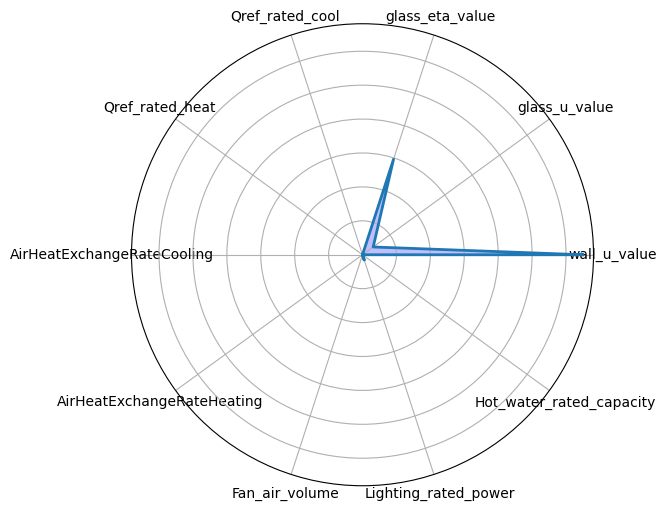

In [16]:
import matplotlib.pyplot as plt
# Number of variables
categories = ['wall_u_value', 'glass_u_value', 'glass_eta_value', 'Qref_rated_cool', 'Qref_rated_heat',
              'AirHeatExchangeRateCooling', 'AirHeatExchangeRateHeating', 'Fan_air_volume', 'Lighting_rated_power', 'Hot_water_rated_capacity']
# Number of variables
num_vars = len(categories)

# Compute the angle for each category
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop" and append the start value to the end.
angles += angles[:1]
normalized_sensitivity = np.concatenate((normalized_sensitivity, [normalized_sensitivity[0]]))

# Create radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw the radar chart
ax.plot(angles, normalized_sensitivity, linewidth=2, linestyle='solid')
ax.fill(angles, normalized_sensitivity, 'b', alpha=0.25)

# Add labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Display the radar chart
plt.show()

In [10]:
normalized_sensitivity

array([6.59281620e-01, 3.95610645e-02, 3.00990715e-01, 1.36403015e-05,
       8.00835545e-07, 1.51091492e-04, 1.05168092e-06, 0.00000000e+00,
       1.62383601e-08, 0.00000000e+00, 6.59281620e-01])